In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import streamlit as st

In [ ]:
# Load the uploaded Excel file
file_path = "https://docs.google.com/spreadsheets/d/1KL1eA-QEhzElPlnw7lFADRFQZUX7uSjX/export?format=csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1137 non-null   object 
 1   magnitude    1137 non-null   float64
 2   type         1137 non-null   object 
 3   title        1137 non-null   object 
 4   date         1137 non-null   object 
 5   url          1137 non-null   object 
 6   detailUrl    1137 non-null   object 
 7   felt         1137 non-null   int64  
 8   cdi          1137 non-null   int64  
 9   mmi          1137 non-null   int64  
 10  status       1137 non-null   object 
 11  tsunami      1137 non-null   int64  
 12  sig          1137 non-null   int64  
 13  net          1137 non-null   object 
 14  nst          1137 non-null   int64  
 15  dmin         1137 non-null   float64
 16  rms          1137 non-null   float64
 17  gap          1137 non-null   int64  
 18  magType      1137 non-null   object 
 19  depth 

(None,
            id  magnitude        type                                  title  \
 0  us6000mzxt        5.4  earthquake    M 5.4 - Bonin Islands, Japan region   
 1  us6000mtex        5.3  earthquake    M 5.3 - Bonin Islands, Japan region   
 2  us6000mjkb        5.3  earthquake  M 5.3 - Volcano Islands, Japan region   
 3  us7000lu1f        5.4  earthquake      M 5.4 - Izu Islands, Japan region   
 4  us6000lfvj        5.7  earthquake     M 5.7 - 46 km NNE of Hirara, Japan   
 
              date                                                url  \
 0    5/21/24 0:39  https://earthquake.usgs.gov/earthquakes/eventp...   
 1    4/24/24 7:22  https://earthquake.usgs.gov/earthquakes/eventp...   
 2   3/18/24 11:04  https://earthquake.usgs.gov/earthquakes/eventp...   
 3   1/26/24 12:46  https://earthquake.usgs.gov/earthquakes/eventp...   
 4  10/16/23 10:42  https://earthquake.usgs.gov/earthquakes/eventp...   
 
                                            detailUrl  felt  cdi  mmi  

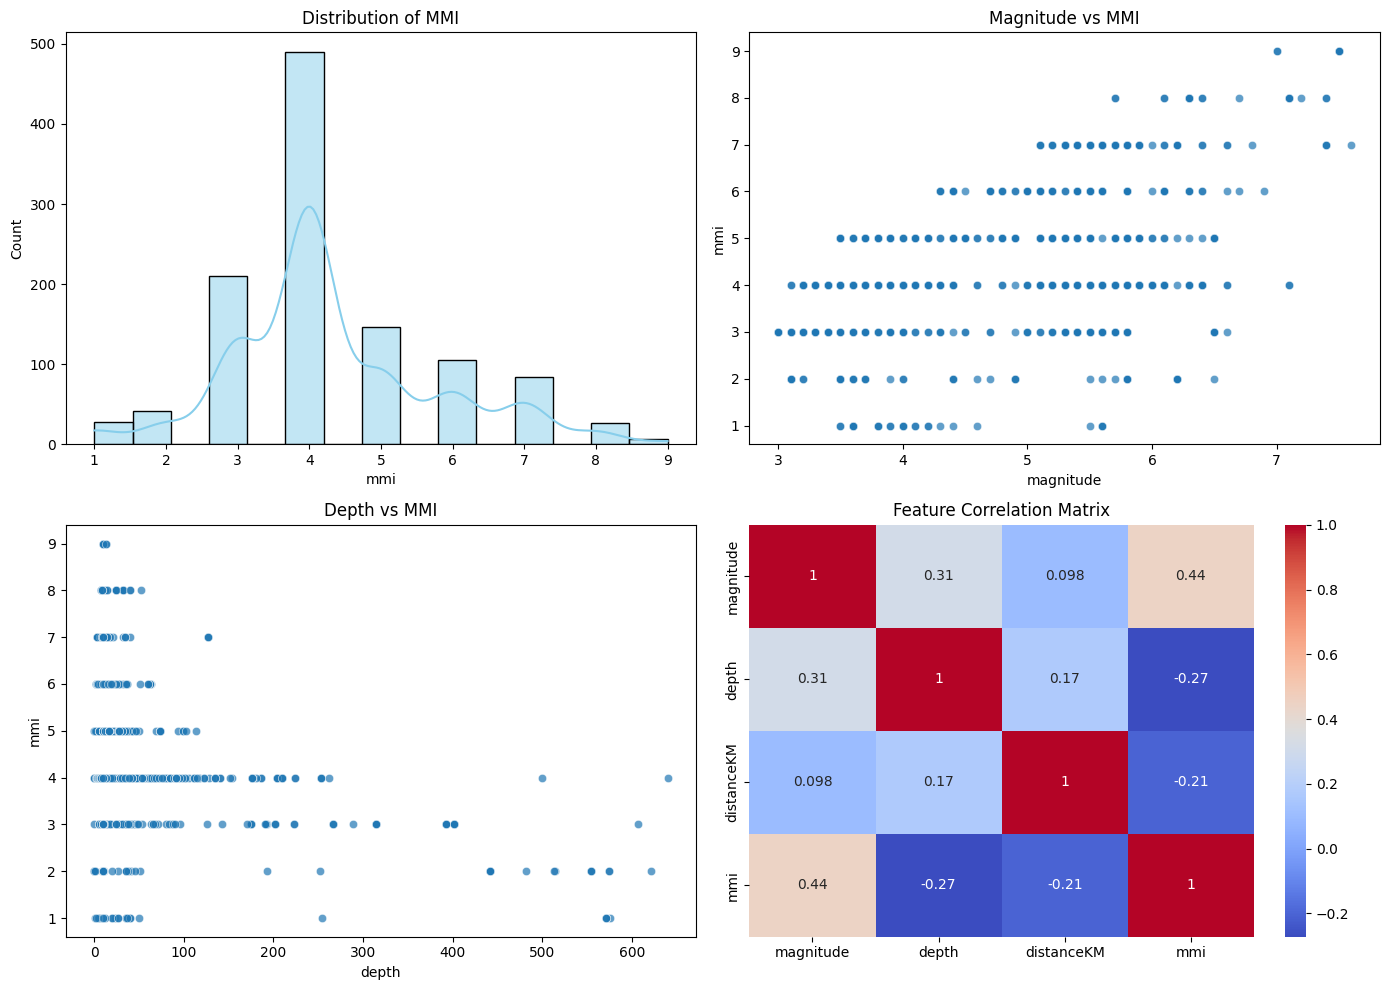

(         magnitude        depth   distanceKM          mmi
 count  1137.000000  1137.000000  1137.000000  1137.000000
 mean      4.856728    41.284081    52.289358     4.320141
 std       1.048058    87.858347    56.027469     1.453949
 min       3.000000     0.000000     0.000000     1.000000
 25%       3.800000     8.000000    15.000000     4.000000
 50%       5.300000    10.000000    37.000000     4.000000
 75%       5.600000    35.000000    61.000000     5.000000
 max       7.600000   640.000000   298.000000     9.000000,
             magnitude     depth  distanceKM       mmi
 magnitude    1.000000  0.309930    0.097953  0.444901
 depth        0.309930  1.000000    0.172591 -0.272374
 distanceKM   0.097953  0.172591    1.000000 -0.207341
 mmi          0.444901 -0.272374   -0.207341  1.000000)

In [ ]:
# Salin dataframe untuk diolah
data = df.copy()

# Pilih kolom yang relevan untuk EDA
eda_cols = ['magnitude', 'depth', 'distanceKM', 'mmi']

# 1. Statistik deskriptif
summary_stats = data[eda_cols].describe()

# 2. Korelasi antar fitur
correlation_matrix = data[eda_cols].corr()

# 3. Visualisasi distribusi dan korelasi
plt.figure(figsize=(14, 10))

# Histogram MMI
plt.subplot(2, 2, 1)
sns.histplot(data['mmi'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of MMI')

# Scatter Magnitude vs MMI
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='magnitude', y='mmi', alpha=0.7)
plt.title('Magnitude vs MMI')

# Scatter Depth vs MMI
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='depth', y='mmi', alpha=0.7)
plt.title('Depth vs MMI')

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

summary_stats, correlation_matrix


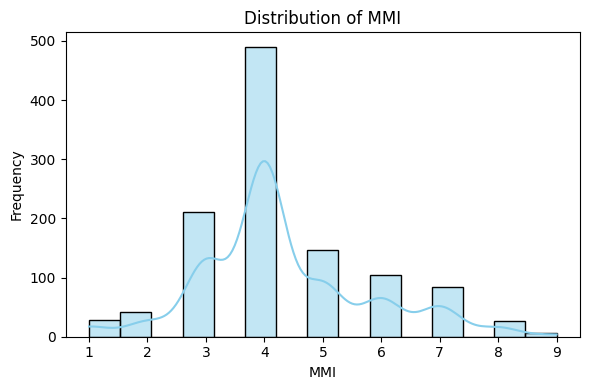

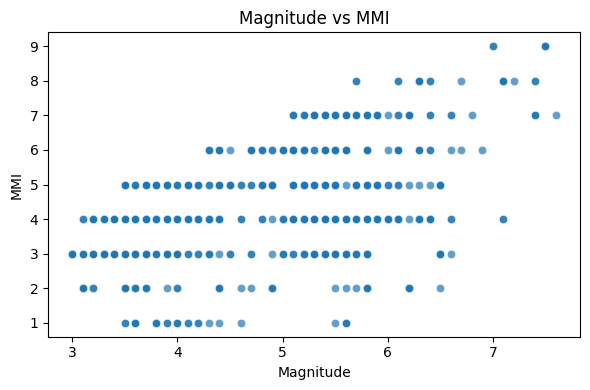

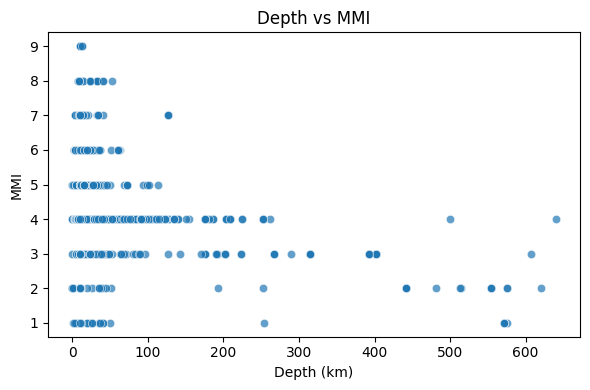

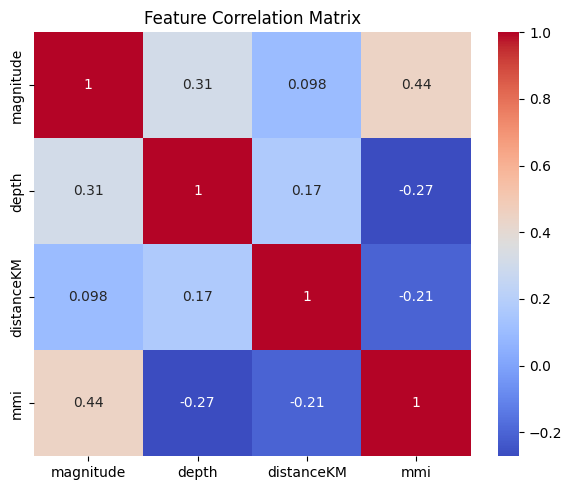

(         magnitude        depth   distanceKM          mmi
 count  1137.000000  1137.000000  1137.000000  1137.000000
 mean      4.856728    41.284081    52.289358     4.320141
 std       1.048058    87.858347    56.027469     1.453949
 min       3.000000     0.000000     0.000000     1.000000
 25%       3.800000     8.000000    15.000000     4.000000
 50%       5.300000    10.000000    37.000000     4.000000
 75%       5.600000    35.000000    61.000000     5.000000
 max       7.600000   640.000000   298.000000     9.000000,
             magnitude     depth  distanceKM       mmi
 magnitude    1.000000  0.309930    0.097953  0.444901
 depth        0.309930  1.000000    0.172591 -0.272374
 distanceKM   0.097953  0.172591    1.000000 -0.207341
 mmi          0.444901 -0.272374   -0.207341  1.000000)

In [ ]:
# Copy dataset
data = df.copy()

# Relevant columns for EDA
eda_cols = ['magnitude', 'depth', 'distanceKM', 'mmi']

# 1. Descriptive statistics
summary_stats = data[eda_cols].describe()

# 2. Correlation matrix
correlation_matrix = data[eda_cols].corr()

# Plot 1: Histogram of MMI
plt.figure(figsize=(6, 4))
sns.histplot(data['mmi'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of MMI')
plt.xlabel('MMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 2: Magnitude vs MMI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='magnitude', y='mmi', alpha=0.7)
plt.title('Magnitude vs MMI')
plt.xlabel('Magnitude')
plt.ylabel('MMI')
plt.tight_layout()
plt.show()

# Plot 3: Depth vs MMI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='depth', y='mmi', alpha=0.7)
plt.title('Depth vs MMI')
plt.xlabel('Depth (km)')
plt.ylabel('MMI')
plt.tight_layout()
plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display summary stats and correlation matrix (optional in Jupyter/Notebook)
summary_stats, correlation_matrix


In [ ]:
# 1. Binning MMI ke dalam 3 kelas
def classify_mmi(mmi):
    if mmi <= 3:
        return 'Low'
    elif mmi <= 6:
        return 'Medium'
    else:
        return 'High'

data['mmi_class'] = data['mmi'].apply(classify_mmi)

# 2. Fitur yang akan digunakan
features = ['magnitude', 'depth', 'distanceKM']
X = data[features]
y = data['mmi_class']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scaling (optional tapi bisa bantu model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model - Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# 6. Evaluasi
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

conf_matrix, pd.DataFrame(class_report).transpose()


(array([[ 17,   0,   8],
        [  0,  48,   2],
        [  1,   4, 148]]),
               precision    recall  f1-score     support
 High           0.944444  0.680000  0.790698   25.000000
 Low            0.923077  0.960000  0.941176   50.000000
 Medium         0.936709  0.967320  0.951768  153.000000
 accuracy       0.934211  0.934211  0.934211    0.934211
 macro avg      0.934743  0.869107  0.894548  228.000000
 weighted avg   0.934568  0.934211  0.931784  228.000000)

1. Simpan model dan scaler (pakai joblib):

In [ ]:
# Simpan model
joblib.dump(rf, "rf_mmi_classifier.pkl")

# Simpan scaler
joblib.dump(scaler, "scaler_mmi.pkl")


['scaler_mmi.pkl']

2. Buat file Streamlit app.py:

In [ ]:
# Load model dan scaler
model = joblib.load('rf_mmi_classifier.joblib')
scaler = joblib.load('scaler_mmi.joblib')

st.set_page_config(page_title="MMI Prediction App", layout="centered")
st.title("🌍 Earthquake MMI Prediction")
st.markdown("Masukkan parameter gempa untuk memprediksi intensitas guncangan (MMI).")

# Form input user
with st.form(key="mmi_form"):
    st.subheader("Earthquake Parameters")
    magnitude = st.number_input("Magnitude", min_value=0.0, max_value=10.0, value=5.0, step=0.1)
    depth = st.number_input("Depth (km)", min_value=0.0, max_value=700.0, value=10.0, step=1.0)
    distance = st.number_input("Distance to epicenter (km)", min_value=0.0, max_value=1000.0, value=50.0, step=1.0)
    latitude = st.number_input("Latitude", value=0.0)
    longitude = st.number_input("Longitude", value=0.0)

    submit = st.form_submit_button("Predict MMI")

if submit:
    input_data = np.array([[magnitude, depth, distance, latitude, longitude]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    st.success(f"✅ Predicted MMI: **{prediction:.2f}**")
